# Introduction to Singular Value Decomposition (SVD)
In one of our lectures, we discussed the concept of <i>matrix factorization</i> methods - where we decompose a matrix into two or more simpler matrices. This is an example of <i>dimensionality reduction</i>, and these simpler matrices allow us to capture the underlying structure and relationships within the data.

Previously, we have discussed Principal Component Analysis (PCA) and Nonnegative Matrix Factorization (NMF) as matrix factorization methods. However, for this blog post we will be looking at: <i>Singular Value Decomposition</i> (SVD). A SVD of a real matrix $A \in \mathbb{R}^{m \times n}$ is:<br><br>
$$
A = UDV^{T}
$$
In this decomposition:
<ol>
    <li> D: $D \in \mathbb{R}^{m \times n} \rightarrow$ whose diagonal contains singular values $\sigma_i$ of $A$. The singular values quantify the importance of each singular vector in capturing the underlying structure and variations in the data. Larger singular values indicate more significant contributions to the data's variation, while smaller singular values represent less significant contributions.
    <li> U: $U \in \mathbb{R}^{m \times m} \rightarrow \text{Orthogonal Matrix}$ 
    <li> V: $V \in \mathbb{R}^{n \times n} \rightarrow \text{Orthogonal Matrix}$
</ol>

# Matrix Approximation using SVD
In this section of the blog post, we aim to:
<ol>
    <li> Get acquainted with <i>numpy's</i> implementation of SVD
    <li> Develop an appreciation of how SVD allows us to approximate a matrix $A$ using much smaller representations of matrices
</ol>

#### <font color="green">Getting Acquainted with <i>Numpy's</i> Implementation of SVD</font>
Before we decompose a matrix $A$ using SVD, we need to construct a sample matrix $A$:

In [1]:
from matplotlib import pyplot as plt
import numpy as np
np.random.seed(12345)

a1 = np.random.randint(1, 3, (5, 4))
a2 = np.random.randint(1, 3, (4, 8))

#constructing our sample matrix A
A = a1@a2 + 0.1*np.random.rand(5, 8)

Now, we can go ahead and visualize this matrix: 

In [2]:
A

array([[11.09940146, 11.06768737, 12.07908225, 14.01709143, 14.00268493,
        11.08003702, 10.09037225, 11.00246762],
       [ 7.04917473,  8.05262552,  9.0596366 , 10.00519575, 10.08950895,
         8.07282662,  7.081835  ,  8.05002228],
       [11.08101894, 10.00959685, 12.021895  , 14.02587191, 14.04681058,
        10.04593732, 11.07095098, 10.0178053 ],
       [ 9.05314499, 10.01677422, 11.07688139, 12.09281705, 12.06094937,
         9.01501835,  8.04896267, 10.0377345 ],
       [10.08486014, 11.09110972, 13.03838487, 14.03154959, 14.05683942,
        10.0187818 , 10.01258415, 11.06875958]])

With matrices, it is often of utility to visualize them as an image to get an understanding of the underlying pattern:

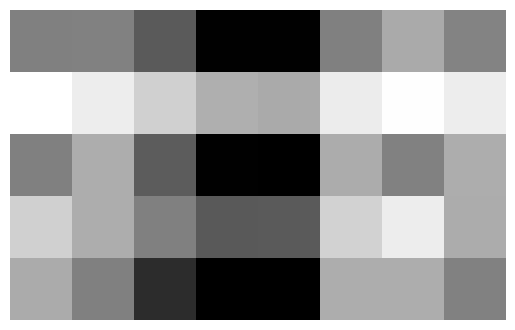

In [3]:
plt.imshow(A, cmap = "Greys")
a = plt.gca().axis("off")

Now that we have our matrix $A$, we can use <i>numpy's</i> implementation of SVD, to get $U$, $V$, and <i>sigma</i> which has been discussed above. The only difference is that we get <i>sigma</i> and not $D$. This means that we get a numpy array of the singular values of $A$, but we have to construct a diagonal matrix - $D$ - ourselves, where the diagonals contain the singular values of $A$. We can wrap up all of these functionalities in a single <code>getValues</code> function, which will call the <code>diagonalize</code> function to create the matrix $D$ out of <i>sigma</i>:

In [4]:
def getValues(matrix):
    U, sigma, V = np.linalg.svd(matrix)
    D = diagonalize(matrix, sigma)
    return U, D, V

def diagonalize(matrix, sigma):
    # creating the D matrix in the SVD 
    # here the matrix of 0s will have the same shape as A
    D = np.zeros_like(matrix, dtype=float)
    # putting the singular values along the diagonal of D
    D[:min(matrix.shape),:min(matrix.shape)] = np.diag(sigma)  
    return D

U, D, V = getValues(A)

Now, let us try to reconstruct $A$ using the decomposed matrices as displayed in the formula above and compare it to the original $A$:

In [5]:
U @ D @ V

array([[11.09940146, 11.06768737, 12.07908225, 14.01709143, 14.00268493,
        11.08003702, 10.09037225, 11.00246762],
       [ 7.04917473,  8.05262552,  9.0596366 , 10.00519575, 10.08950895,
         8.07282662,  7.081835  ,  8.05002228],
       [11.08101894, 10.00959685, 12.021895  , 14.02587191, 14.04681058,
        10.04593732, 11.07095098, 10.0178053 ],
       [ 9.05314499, 10.01677422, 11.07688139, 12.09281705, 12.06094937,
         9.01501835,  8.04896267, 10.0377345 ],
       [10.08486014, 11.09110972, 13.03838487, 14.03154959, 14.05683942,
        10.0187818 , 10.01258415, 11.06875958]])

In [6]:
A

array([[11.09940146, 11.06768737, 12.07908225, 14.01709143, 14.00268493,
        11.08003702, 10.09037225, 11.00246762],
       [ 7.04917473,  8.05262552,  9.0596366 , 10.00519575, 10.08950895,
         8.07282662,  7.081835  ,  8.05002228],
       [11.08101894, 10.00959685, 12.021895  , 14.02587191, 14.04681058,
        10.04593732, 11.07095098, 10.0178053 ],
       [ 9.05314499, 10.01677422, 11.07688139, 12.09281705, 12.06094937,
         9.01501835,  8.04896267, 10.0377345 ],
       [10.08486014, 11.09110972, 13.03838487, 14.03154959, 14.05683942,
        10.0187818 , 10.01258415, 11.06875958]])

They are the same!

#### <font color = "green">Approximating $A$ using Smaller Matrices</font>
One of the main reasons why SVD is so useful is because we can get a pretty good approximation of the matrix $A$ by choosing a smaller subset of these decomposed matrices: $U$, $D$, and $V$. For instance, in our original situation:<br><br>
$$
A = UDV^{T} = \{m \times m\} \times \{m \times n\} \times \{n \times n\} = \{m \times n\}
$$
<br>However, we can choose a subset say $k$ = 3, where we will only:
<ul>
    <li> Pick the first $k$ columns of U
    <li> Pick the top $k$ singular values of D
    <li> Pick the first $k$ rows of V
</ul>

Which gives us:<br><br>
$$
A = UDV^{T} = \{m \times k\} \times \{k \times k\} \times \{k \times n\} = \{m \times n\}
$$
<br>Therefore, we can get a $m \times n$ approximation of $A$ using a smaller subset of these decomposed matrices. The way this works is that in SVD, the obtained singular values are present in decreasing order of "importance". This means that the first singular value is typically the most important in terms of capturing the primary patterns, structures, and variations of the data, and this "importance" keeps on decreasing as we go down. Therefore, depending on our value of $k$, we can get a pretty good approximation of the original matrix using a relatively smaller subset of the decomposed matrices. To see this in practice, let us create a function that will allow us to visualize our: original matrix $A$ and the reconstructed matrix $A$ with a smaller subset of the decomposed matrices, as images. This will allow us to get an appreciation of how similar the reconstructed matrix $A$ is to the original one, while saving us a lot of space because we used a smaller subset of the matrices:

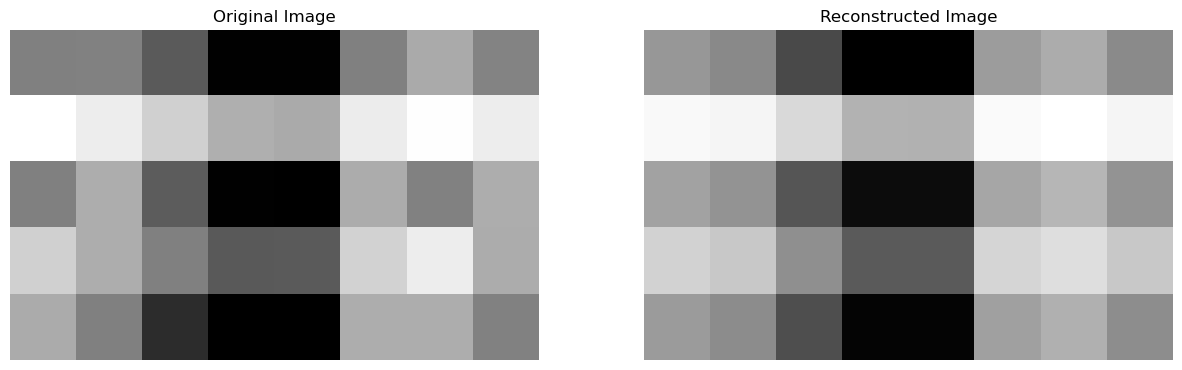

In [7]:
def compareImages(A, A_):
    fig, axarr = plt.subplots(1, 2, figsize = (15, 5))
    
    axarr[0].imshow(A, cmap = "Greys")
    axarr[0].axis("off")
    axarr[0].set(title = "Original Image")
    
    axarr[1].imshow(A_, cmap = "Greys")
    axarr[1].axis("off")
    axarr[1].set(title = "Reconstructed Image")

#creating subsets of the decomposed matrices
k = 1
U_ = U[:,:k]
D_ = D[:k, :k]
V_ = V[:k, :]
A_ = U_ @ D_ @ V_

# visualizing the original and reconstructed matrix A (images)
compareImages(A, A_)

Therefore, we can see that our <i>reconstructed image</i> is pretty much the same as the original image, and we have reduced the size of our problem from: 
<ol>
    <li> $A_\text{original} = \{5 \times 8\} = 40 \text{ units}$, to 
    <li> $A_\text{reconstructed} = U_{\text{k}}D_{\text{k}}V_{\text{k}}^{T} = \{5 \times 1\} + \{1 \times 1\} + \{1 \times 8\} = 14 \text{ units}$
</ol>

# Image Compression using Matrix Approximation
Now that we have understood how using SVD, we can get a fairly good approximation of the matrix $A$ using a much smaller subset of the decomposed matrices, we can go ahead and apply to this to <i>image compression</i>. In simple words, what we are trying to do is: 
<ol>
    <li>Represent an image as a matrix,
    <li>Decompose the matrix using SVD,
    <li>Use a smaller subset of these decomposed matrices to reconstruct the original image (matrix)
</ol>  

For the purpose of this experiment, the chosen image is:
<center>
    <figure>
      <img src ="spongebob.jpg" height=500 width=800 caption="Mr. Squarepants"/>
      <figcaption>SpongeBob SquarePants</figcaption>
    </figure>
</center>

Now, let us get started:

In [8]:
import PIL
import urllib

#function to read an image and save it as a numpy array 
def read_image(url):
    return np.array(PIL.Image.open(urllib.request.urlopen(url)))

url = "https://i.pinimg.com/originals/1f/f9/68/1ff9682f61e99f217bb67a61f02ecb56.jpg"

img = read_image(url)

np.shape(img)

(1200, 1920, 3)

Therefore, we can see that our image is stored as a numpy object of shape: $1200 \times 1920 \times 3$, this means that there are $1200$ rows, $1920$ columns, and the $3$ is representative of the RGB channels - since at each pixel there is a numerical value for all red, green, and blue. To simplify our task of image compression using SVD, we want to deal with a 2-Dimensional matrix. To do this, we can convert this image to <i>greyscale</i> in which case it will have dimensions: $1200 \times 1920$ - $1200$ rows, $1920$ columns, and each value will range from $0$ to $255$. Where, $0$ = Black, and $255$ = White. Converting our image to <i>greyscale</i>:

In [9]:
def to_greyscale(image):
    return 1 - np.dot(image[...,:3], [0.2989, 0.5870, 0.1140])

grey_img = to_greyscale(img)

np.shape(grey_img)

(1200, 1920)

As mentioned, the image is now a $1200 \times 1920$ matrix. Now, let us visualize the original and greyscale image side-by-side:

[Text(0.5, 1.0, 'Greyscale Image')]

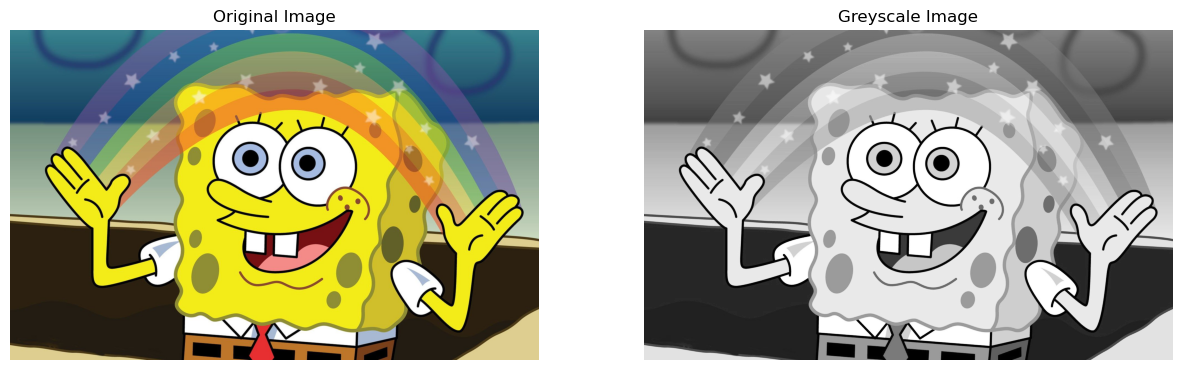

In [10]:
fig, axarr = plt.subplots(1, 2, figsize = (15, 5))

axarr[0].imshow(img)
axarr[0].axis("off")
axarr[0].set(title = "Original Image")

axarr[1].imshow(grey_img, cmap = "Greys")
axarr[1].axis("off")
axarr[1].set(title = "Greyscale Image")

#### <font color = "green">Reconstructing the Image from its Singular Value Decomposition</font>
Now, we will write the function <code>svd_reconstruct</code> which will reconstruct an image using $k$ singular values:

In [11]:
def svd_reconstruct(image, k):
    U, D, V = getValues(image)
    U_ = U[:,:k]
    D_ = D[:k, :k]
    V_ = V[:k, :]
    grey_img_recon = U_ @ D_ @ V_
    return grey_img_recon

Now, we can go ahead and visualize how our reconstructed image would look with, let's say, $k = 50$ singular values: 

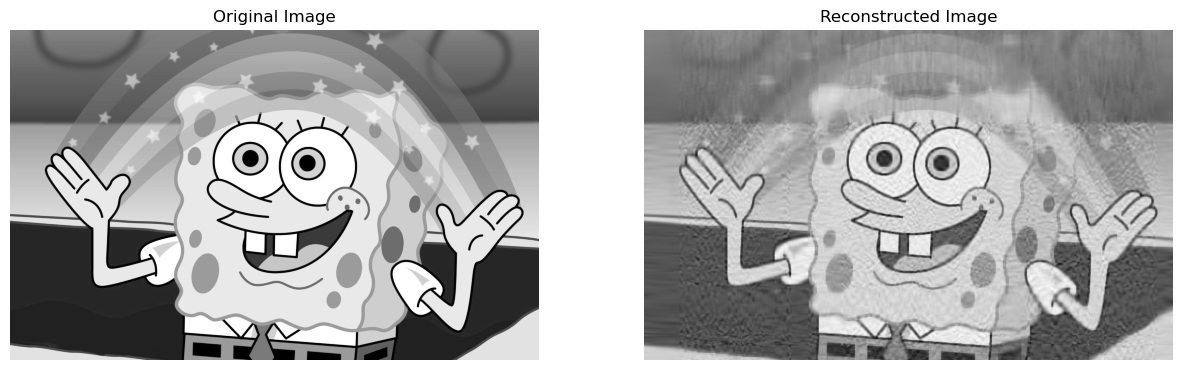

In [12]:
compareImages(grey_img, svd_reconstruct(grey_img, 50))

#### <font color="green">Experimenting with Different Values of $k$</font>

In this, part of the code, we first want to modify our <code>svd_reconstruct</code> to incorporate the calculation of how much space we are saving for differing values of $k$. The formula for this would be:<br><br>
$$
\text{Percent Storage} = \frac{\text{Storage Needed for Reconstructed}}{\text{Storage Needed for Original}} = \frac{\{(m \times k) + (k \times k) + (k \times n)\} \times 8 \text{ bits}}{m \times n \times 8 \text{ bits}}
$$

$$
= (\frac{mk + kk + kn}{mn}) \times 100
$$
<br>We know, that the matrix of our original image contains $m \times n$ values - each of which is 8 bytes, if we perform SVD and choose $k$ singular values, then we have $mk + kk + kn$ values - each of which is 8 bytes! Thus, the above formula represents the way in which we can achieve percent storage.

<b><u>Note</u>: Percent Storage is a measure of what percentage of the original size is the reconstructed image using! So, % Storage = $30$% means that the reconstructed image's storage size is $30$% of that of the original!</b>

In [13]:
def svd_reconstruct(image, k):
    U, D, V = getValues(image)
    U_ = U[:,:k]
    D_ = D[:k, :k]
    V_ = V[:k, :]
    grey_img_recon = U_ @ D_ @ V_
    
    #code for calculating percent storage
    reconstructedStorage = (image.shape[0] * k) + (k * k) + (k * image.shape[1])
    originalStorage = image.shape[0] * image.shape[1]
    percentStorage = np.round((reconstructedStorage/originalStorage) * 100, 2)
    
    #returning reconstructed image, and % storage
    return grey_img_recon, percentStorage

Now, we want to write our <code>svd_experiment</code> function which will help us look at the effects that varying size of $k$ has on: the quality of the image, and the % storage:

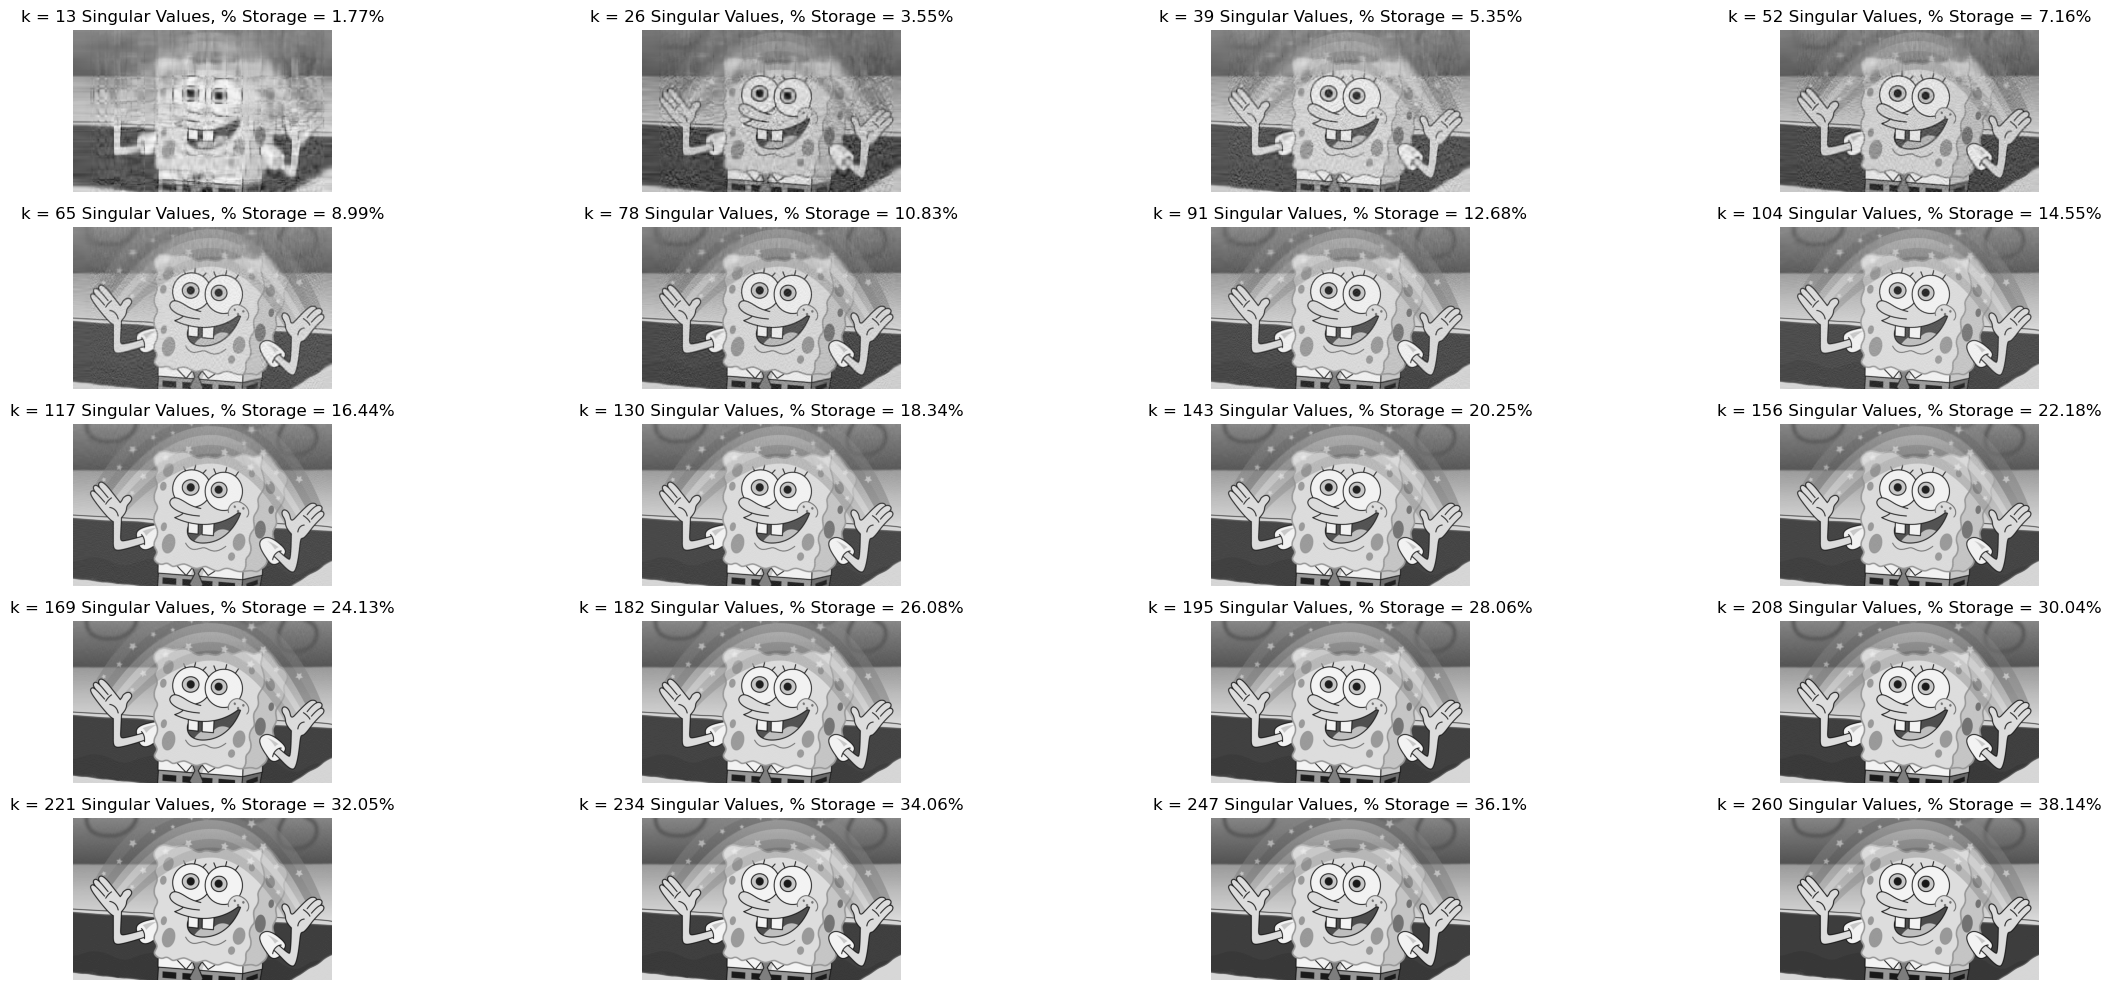

In [14]:
def svd_experiment(image):
    rows = 5
    cols = 4
    fig, axarr = plt.subplots(rows, cols, figsize = (25, 10))
    k = [13 * i for i in range(1, 21)]
    index = 0
    for i in range(rows):
        for j in range(cols):
            #using the value of k at a particular index and then incrementing
            reconstructedImg, perStorage = svd_reconstruct(image, k[index])
            index+=1
            #showing the reconstructed image
            axarr[i][j].imshow(reconstructedImg, cmap = "Greys")
            axarr[i][j].axis("off")
            axarr[i][j].set(title = f"k = {k[index-1]} Singular Values, % Storage = {perStorage}%")
    fig.tight_layout()
    
svd_experiment(grey_img)

Therefore, we can see that as the number of $k$ decrease, the quality of the picture becomes blurrier, however the % storage falls. For example in our situation for $k = 13$, the reconstructed image's size is $1.77$% of the original image. However, the quality of the image is really low. 

To get an appreciation for SVD, we should realize that for around $k = 104$, the reconstructed image becomes pretty similar to the original, but the reconstructed image only takes 14.55% the storage that the original one took!

# Optional Extras
In this section of the blog post, we want to modify our <code>svd_reconstruct</code> function to allow the user to:
<ol>
    <li> Specify a Desired Compression Factor and Select the Number of Components $k$ based on this Selection:<br><br>
        $$
        \text{Compression Factor (CF)} = \frac{\text{Size of Compressed Bits}}{\text{Size of Original Bits}}
        $$
        $$
        \text{CF} =\frac{mk + k^{2} + kn}{mn} = \frac{k^2 + k(m+n)}{mn} 
        $$
        $$
        k^2 + k(m+n) = (mn) \times \text{ CF}
        $$
        $$
        k^2 + k(m+n) - [(mn) \times \text{ CF}] = 0 
        $$
        Therefore, we can solve this quadratic equation and get the value for $k$, for the user provided compression factor!<br><br>
    <li> Specify a Desired Threshold <i>epsilon</i> for the Singular Values: selecting all singular values $i$, such that:<br><br> 
        $$
            \sigma_{i} \geq \epsilon_{\text{threshold}}
        $$
</ol>

<b><u>Note</u>: The following implementation assumes that the user will either only specify the (1) <i>compression factor</i>, or only the (2) <i>epsilon factor</i>, or only the explicit value of (3) <i>k - Singular Values</i></b>

In [15]:
def svd_reconstruct(image, k, cf = 0, epsilon = 0):
    grey_img_recon = 0
    
    # checking for when compression factor is specified
    if(cf!=0):
        # specifying the coefficients of the quadratic equation
        a = 1
        b = image.shape[0] + image.shape[1]
        c = (-1) * cf  * image.shape[0] * image.shape[1]
        # only looking at the positive value - therefore ignoring the negative
        k = (-b + np.sqrt((b*b)-(4*a*c)))/(2*a)
        # rounding the value of k - since we can only have whole values - and converting to integer
        k = np.round(k)
        k = k.astype(int)
        # reconstructing our grey image, based on this value of k 
        U, D, V = getValues(image)
        U_ = U[:,:k]
        D_ = D[:k, :k]
        V_ = V[:k, :]
        grey_img_recon = U_ @ D_ @ V_
        
    # checking for when epsilon value is specified
    elif(epsilon!=0):
        U, sigma, V = np.linalg.svd(image)
        # finding k - the number of singular values which are 
        # above epsilon - the specified threshold 
        k = (sigma[sigma>epsilon]).size
        D = diagonalize(image, sigma)
        # reconstructing our grey image, based on this value of k 
        U_ = U[:,:k]
        D_ = D[:k, :k]
        V_ = V[:k, :]
        grey_img_recon = U_ @ D_ @ V_
    
    # checking for default case when only 
    elif(epsilon==0 and cf==0):
        U, D, V = getValues(image)
        U_ = U[:,:k]
        D_ = D[:k, :k]
        V_ = V[:k, :]
        grey_img_recon = U_ @ D_ @ V_
        
    #code for calculating percent storage
    reconstructedStorage = (image.shape[0] * k) + (k * k) + (k * image.shape[1])
    originalStorage = image.shape[0] * image.shape[1]
    percentStorage = np.round((reconstructedStorage/originalStorage) * 100, 2)
    
    #returning reconstructed image, and % storage
    return grey_img_recon, percentStorage

#### <font color="green">Experiments with Different Values of Compression Factor</font>

Now, we can go ahead get a reconstructed image with a compression factor of say $0.05$! This means that the reconstructed image, will be $0.05 * 100 = 5$% of the storage of the actual image:

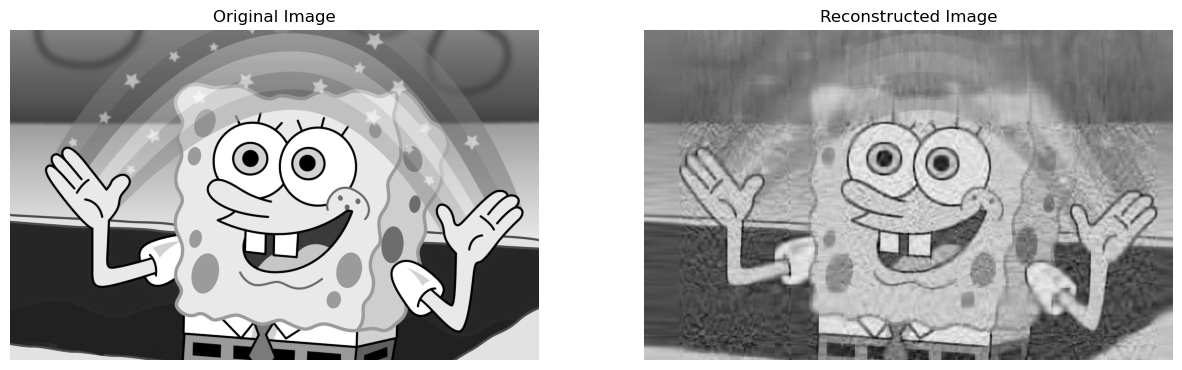

In [16]:
reconstructedImage, perStorage = svd_reconstruct(grey_img, 0, 0.05)
compareImages(grey_img, reconstructedImage)

Now, we can go ahead get a reconstructed image with a compression factor of say $0.3$! This means that the reconstructed image, will be $0.3 * 100 = 30$% of the storage of the actual image:

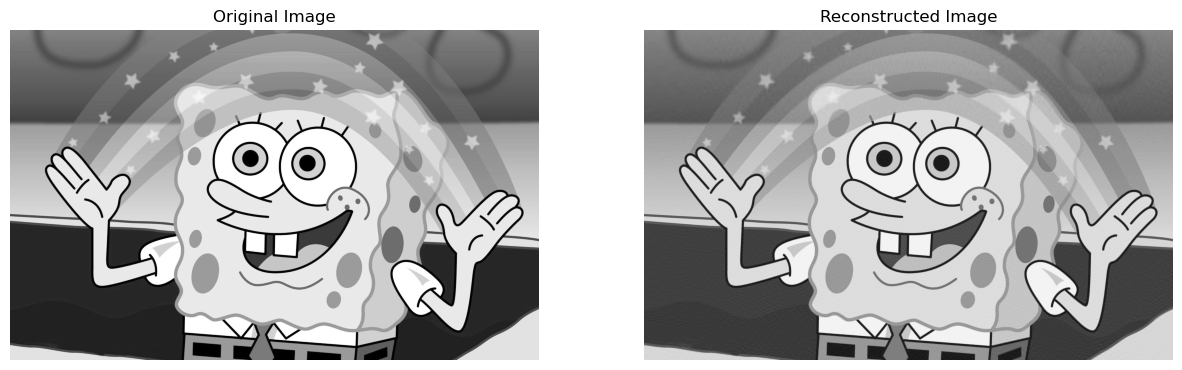

In [17]:
reconstructedImage, perStorage = svd_reconstruct(grey_img, 0, 0.3)
compareImages(grey_img, reconstructedImage)

Therefore, we can see that as the compression factor goes up, the reconstructed image becomes more like the original image!

#### <font color="green">Experiments with Different Values of Epsilon - $\epsilon$</font>

Finally, we can experiment providing an $\epsilon$ - epsilon value, which provides a threshold and only the singular values larger than this specified value will be selected. Let us say, we choose $\epsilon = 13000$ as our threshold. Therefore, only the singular values which are larger than $13000$ will be used in the image reconstruction:

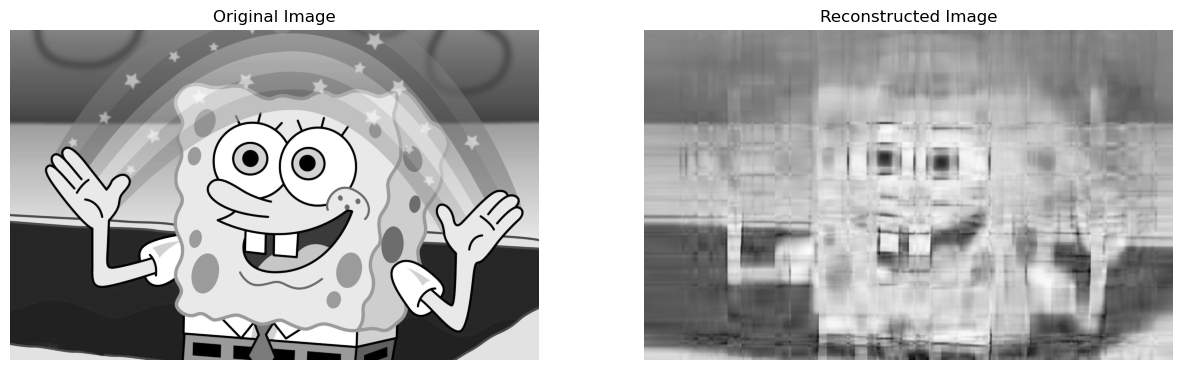

In [18]:
reconstructedImage, perStorage = svd_reconstruct(grey_img, 0, 0, 13000)
compareImages(grey_img, reconstructedImage)

Let us say, we choose $\epsilon = 130$ as our threshold. Therefore, only the singular values which are larger than $130$ will be used in the image reconstruction:

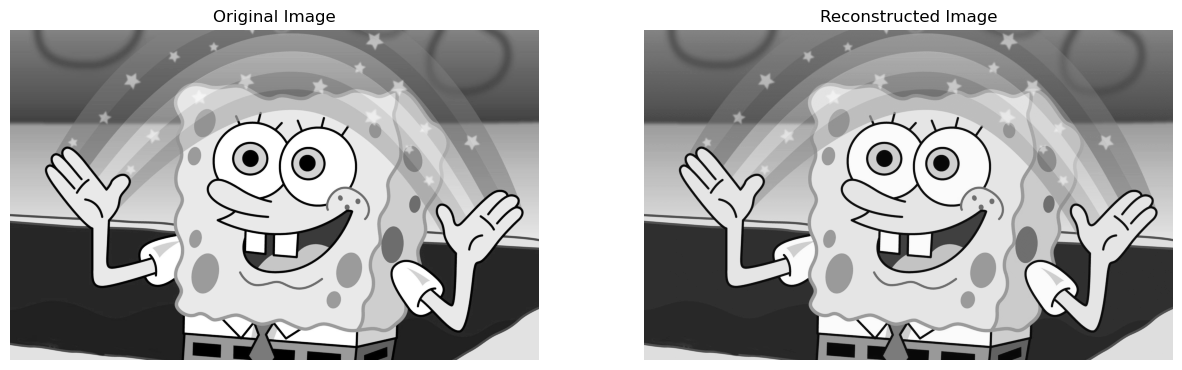

In [19]:
reconstructedImage, perStorage = svd_reconstruct(grey_img, 0, 0, 130)
compareImages(grey_img, reconstructedImage)

Therefore, we can see that as our threshold for the singular values goes down, more and more singular values are used in the image reconstruction, and therefore the reconstructed image becomes more like the original!